# CREDIT CARD FRAUD ANALYSIS AND MODELING

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('classic')

# Dataset Imported

In [2]:
train=pd.read_csv("C:\\Users\\hp\\Documents\\fraudTrain.csv")
test=pd.read_csv("C:\\Users\\hp\\Downloads\\Credit test.csv",parse_dates=['trans_date_trans_time'])

In [3]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
print(train.shape)
print(test.shape)

(1296675, 23)
(555719, 23)


In [5]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

<AxesSubplot:>

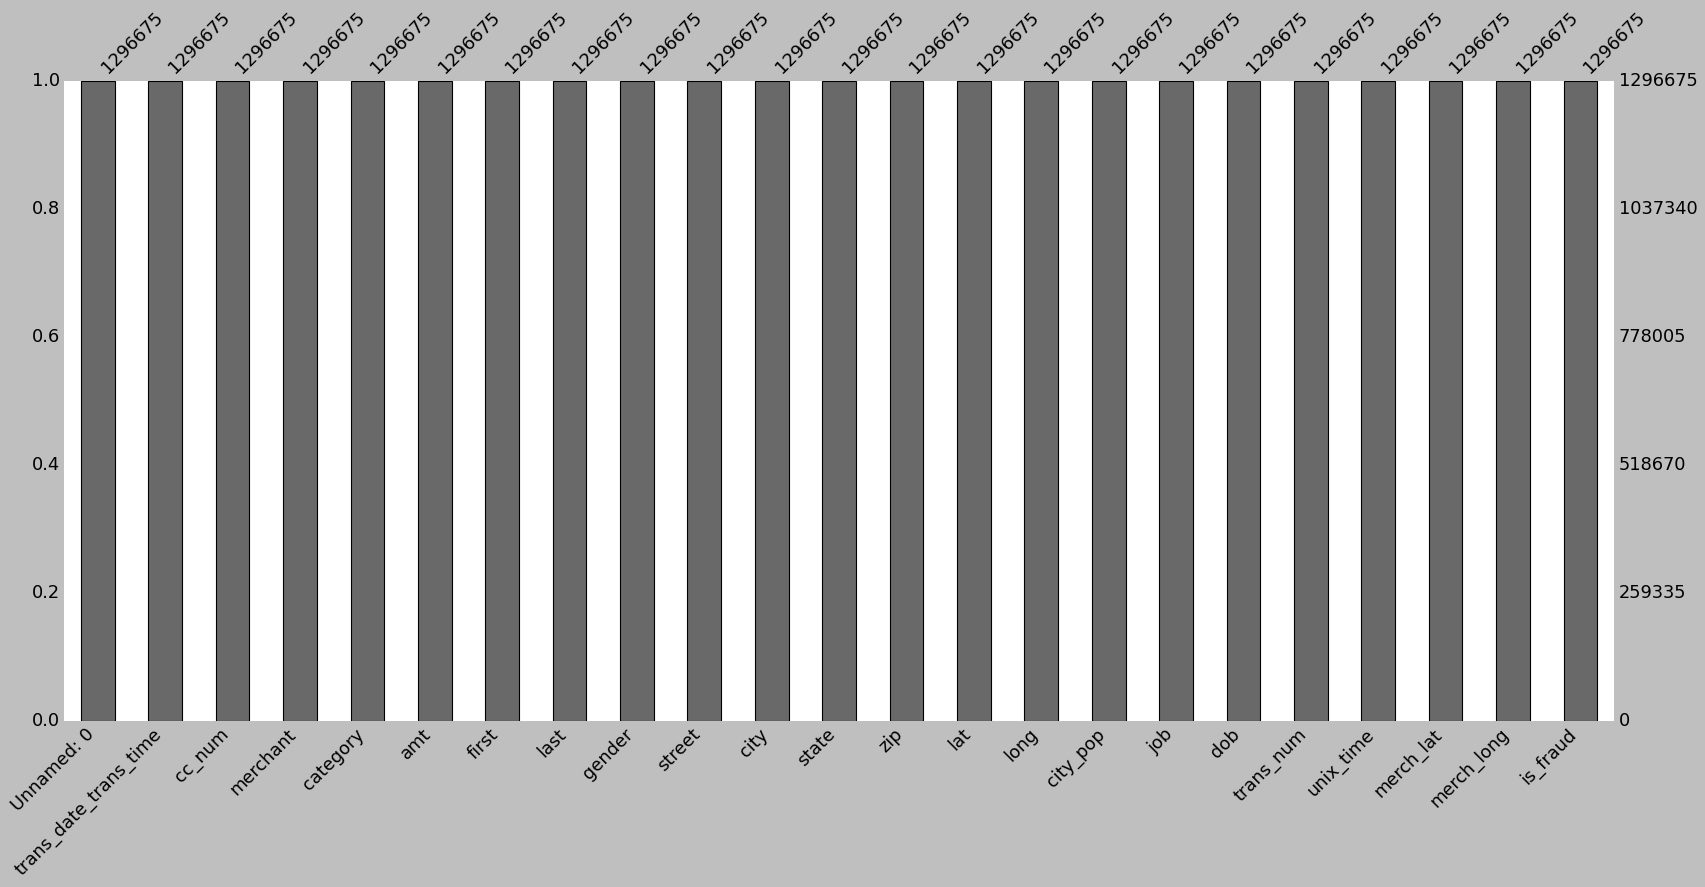

In [8]:
msno.bar(train)

# Duplicates

In [9]:
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


# Data Cleaning 

# Extract Date Time Componet

In [10]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])

In [11]:
train['year']=train['trans_date_trans_time'].dt.year
train['month']=train['trans_date_trans_time'].dt.month
train['day']=train['trans_date_trans_time'].dt.day
train['hour']=train['trans_date_trans_time'].dt.hour
train['minute']=train['trans_date_trans_time'].dt.minute
train['second']=train['trans_date_trans_time'].dt.second

In [12]:
test['year']=test['trans_date_trans_time'].dt.year
test['month']=test['trans_date_trans_time'].dt.month
test['day']=test['trans_date_trans_time'].dt.day
test['hour']=test['trans_date_trans_time'].dt.hour
test['minute']=test['trans_date_trans_time'].dt.minute
test['second']=test['trans_date_trans_time'].dt.second

# Calculating Age

In [13]:
train['age'] = (pd.to_datetime('today').year - pd.DatetimeIndex(train['dob']).year )

In [14]:
test['age'] = (pd.to_datetime('today').year - pd.DatetimeIndex(test['dob']).year )

# Extracting Numbers From Street Column

In [15]:
street_num=[]
for i in train['street']:
    i=str(i)
    a=i.split(" ")
    street_num.append(a[0])

In [16]:
train['street_num']=street_num

In [17]:
street_num1=[]
for i in test['street']:
    i=str(i)
    b=i.split(" ")
    street_num1.append(b[0])

In [18]:
test['street_num']=street_num1

In [19]:
train['street_num']=train['street_num'].astype('int32')
test['street_num']=test['street_num'].astype('int32')

# Finding Outliers

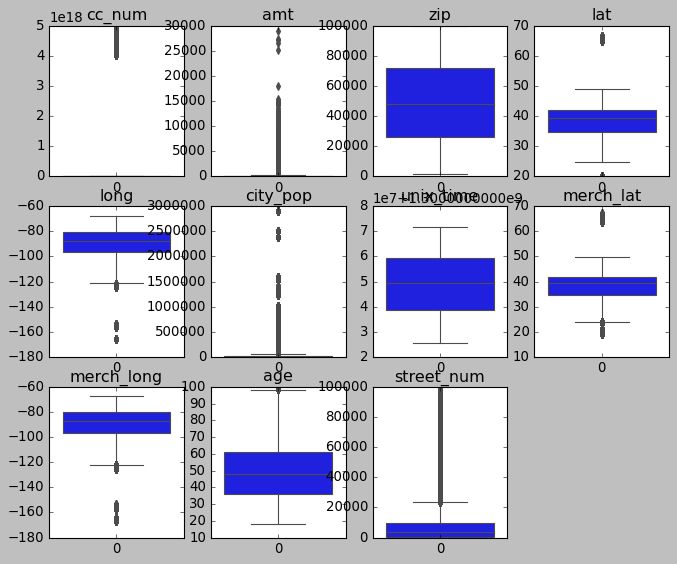

In [20]:
fig = plt.figure(figsize=(10,8))
plt.subplot(3,4,1)
plt.title('cc_num')
sns.boxplot(data = train['cc_num'])


plt.subplot(3,4,2)
plt.title('amt')
sns.boxplot(data = train['amt'])


plt.subplot(3,4,3)
plt.title('zip')
sns.boxplot(data = train['zip'])


plt.subplot(3,4,4)
plt.title('lat')
sns.boxplot(data = train['lat'])


plt.subplot(3,4,5)
plt.title('long')
sns.boxplot(data = train['long'])


plt.subplot(3,4,6)
plt.title('city_pop')
sns.boxplot(data = train['city_pop'])


plt.subplot(3,4,7)
plt.title('unix_time')
sns.boxplot(data = train['unix_time'])


plt.subplot(3,4,8)
plt.title('merch_lat')
sns.boxplot(data = train['merch_lat'])


plt.subplot(3,4,9)
plt.title('merch_long')
sns.boxplot(data = train['merch_long'])


plt.subplot(3,4,10)
plt.title('age')
sns.boxplot(data = train['age'])


plt.subplot(3,4,11)
plt.title('street_num')
sns.boxplot(data = train['street_num'])
plt.show()

# Drop Unnecessary Columns

We performed feature Selection Technique 
1. Random Feature SElection 
2.Correlation 

In [21]:
train.corr()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second,age,street_num
Unnamed: 0,1.000000,0.000386,-0.000251,0.000709,0.000602,-0.000676,-0.001678,0.998971,0.000541,-0.000671,-0.004767,0.783311,0.181956,0.018860,0.001073,0.000030,0.000174,-0.003736,0.000086
cc_num,0.000386,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981,0.000466,-0.000281,0.000545,-0.000801,0.000812,0.000036,-0.000291,-0.012228
amt,-0.000251,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404,0.000842,-0.001748,0.000629,-0.022811,0.000383,0.001405,-0.009748,0.003814
zip,0.000709,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162,0.000086,0.000852,-0.000607,0.005938,0.000766,0.000127,0.011004,-0.018631
lat,0.000602,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894,0.001274,-0.001072,-0.000138,-0.011508,-0.000243,-0.000221,0.047845,-0.072439
long,-0.000676,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721,0.000191,-0.001213,0.000031,-0.002290,-0.000825,0.000325,-0.030231,0.024250
city_pop,-0.001678,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136,-0.001673,0.000137,0.000159,0.020381,-0.000713,0.000690,-0.091271,-0.023934
unix_time,0.998971,0.000354,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078,0.782582,0.184868,0.017162,0.000756,0.000006,0.000191,-0.003655,0.000058
merch_lat,0.000541,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741,0.001244,-0.001116,-0.000276,-0.011378,-0.000217,-0.000281,0.047458,-0.071931
merch_long,-0.000671,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721,0.000184,-0.001197,0.000076,-0.002325,-0.000820,0.000310,-0.030154,0.024208


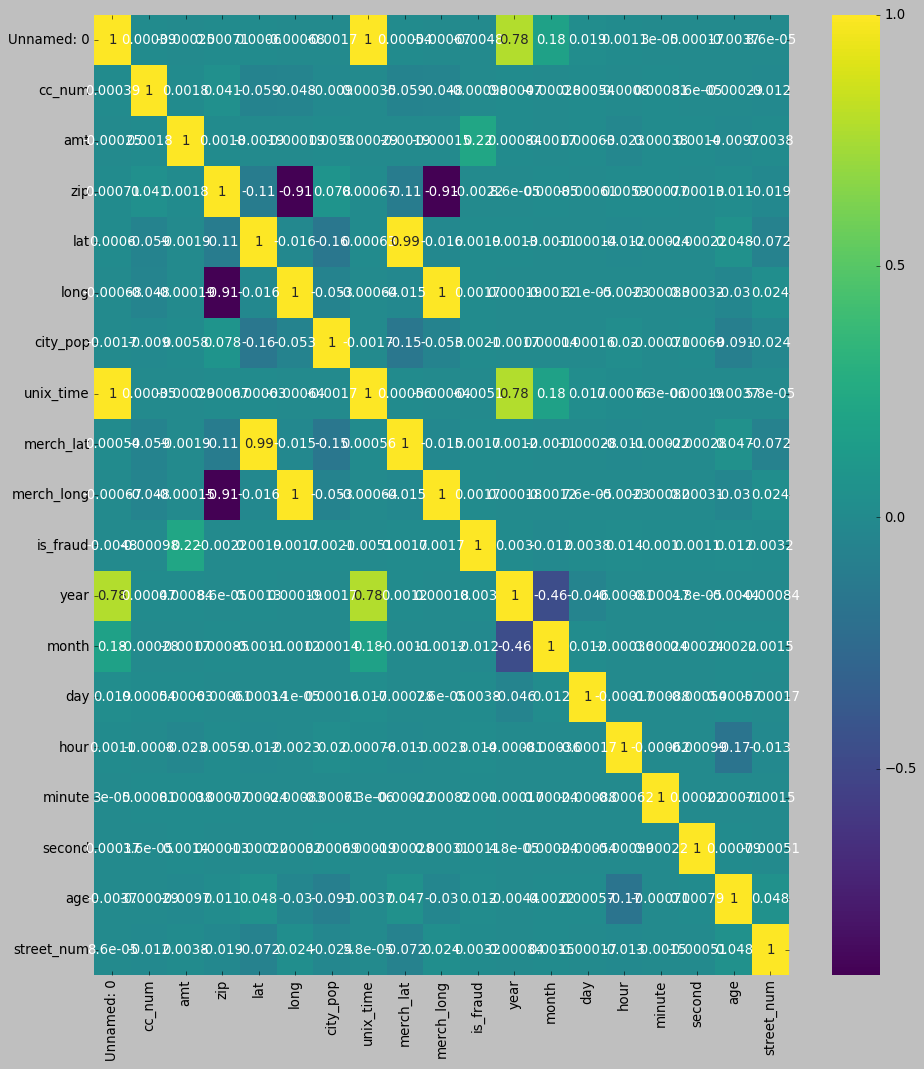

In [22]:
plt.figure(figsize=(14,15))
sns.heatmap(train.corr(),annot=True,cmap="viridis")
plt.show()

In [23]:

train=train.drop(['Unnamed: 0','cc_num','unix_time','street','city','job','zip','merchant','trans_date_trans_time','dob','first','last','trans_num','street_num'], axis=1)

In [24]:
test=test.drop(['Unnamed: 0','cc_num','unix_time','street','city','job','zip','merchant','trans_date_trans_time','dob','first','last','trans_num','street_num'], axis=1)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1296675 non-null  object 
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  object 
 3   state       1296675 non-null  object 
 4   lat         1296675 non-null  float64
 5   long        1296675 non-null  float64
 6   city_pop    1296675 non-null  int64  
 7   merch_lat   1296675 non-null  float64
 8   merch_long  1296675 non-null  float64
 9   is_fraud    1296675 non-null  int64  
 10  year        1296675 non-null  int64  
 11  month       1296675 non-null  int64  
 12  day         1296675 non-null  int64  
 13  hour        1296675 non-null  int64  
 14  minute      1296675 non-null  int64  
 15  second      1296675 non-null  int64  
 16  age         1296675 non-null  int64  
dtypes: float64(5), int64(9), object(3)
memory usage: 168.2+ MB


# Treating Outliers

In [26]:
train.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second,age
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,3.853762e+01,-9.022634e+01,8.882444e+04,3.853734e+01,-9.022646e+01,5.788652e-03,2.019287e+03,6.142150e+00,1.558798e+01,1.280486e+01,2.949529e+01,2.950215e+01,4.974255e+01
std,1.603160e+02,5.075808e+00,1.375908e+01,3.019564e+05,5.109788e+00,1.377109e+01,7.586269e-02,4.522452e-01,3.417703e+00,8.829121e+00,6.817824e+00,1.732018e+01,1.731539e+01,1.737848e+01
min,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01
25%,9.650000e+00,3.462050e+01,-9.679800e+01,7.430000e+02,3.473357e+01,-9.689728e+01,0.000000e+00,2.019000e+03,3.000000e+00,8.000000e+00,7.000000e+00,1.400000e+01,1.500000e+01,3.600000e+01
50%,4.752000e+01,3.935430e+01,-8.747690e+01,2.456000e+03,3.936568e+01,-8.743839e+01,0.000000e+00,2.019000e+03,6.000000e+00,1.500000e+01,1.400000e+01,3.000000e+01,3.000000e+01,4.800000e+01
75%,8.314000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,4.195716e+01,-8.023680e+01,0.000000e+00,2.020000e+03,9.000000e+00,2.300000e+01,1.900000e+01,4.400000e+01,4.400000e+01,6.100000e+01
max,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01,9.900000e+01


In [27]:
Q1=train.amt.quantile(0.25)
Q3=train.amt.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-100.58499999999998, 193.375)

In [28]:
train=train[(train['amt']>=-100) & (train['amt']<=194)]

In [29]:
Q1=train.age.quantile(0.25)
Q3=train.age.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-1.5, 98.5)

In [30]:
train=train[(train['age']>=0) & (train['age']<=98)]

In [31]:
Q1=train.lat.quantile(0.25)
Q3=train.lat.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(23.802299999999995, 52.8367)

In [32]:
train=train[(train['lat']>=26) & (train['lat']<=53)]

In [33]:
Q1=train.long.quantile(0.25)
Q3=train.long.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-121.77465000000001, -55.140649999999994)

In [34]:
train=train[(train['long']>=-119) & (train['long']<=-55)]

In [35]:
Q1=train.city_pop.quantile(0.25)
Q3=train.city_pop.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-26282.5, 45785.5)

In [36]:
train=train[(train['city_pop']>=0) & (train['city_pop']<=4000)]

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671090 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    671090 non-null  object 
 1   amt         671090 non-null  float64
 2   gender      671090 non-null  object 
 3   state       671090 non-null  object 
 4   lat         671090 non-null  float64
 5   long        671090 non-null  float64
 6   city_pop    671090 non-null  int64  
 7   merch_lat   671090 non-null  float64
 8   merch_long  671090 non-null  float64
 9   is_fraud    671090 non-null  int64  
 10  year        671090 non-null  int64  
 11  month       671090 non-null  int64  
 12  day         671090 non-null  int64  
 13  hour        671090 non-null  int64  
 14  minute      671090 non-null  int64  
 15  second      671090 non-null  int64  
 16  age         671090 non-null  int64  
dtypes: float64(5), int64(9), object(3)
memory usage: 92.2+ MB


# EDA

Transaction Amount Vs Fraud

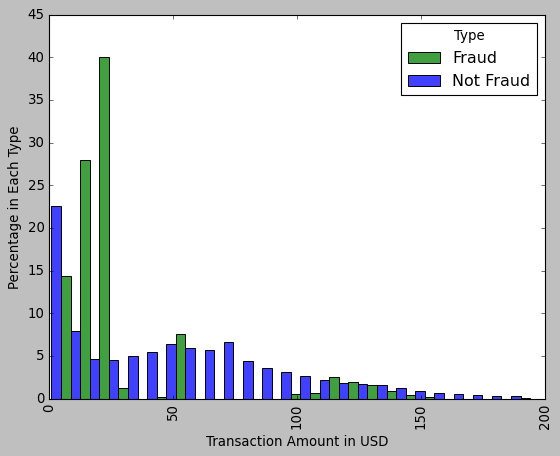

In [38]:
ax=sns.histplot(x='amt',data=train[train.amt<1000], hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.xticks(rotation=90)
plt.show()

Credit Card Holder Age Vs Fraud

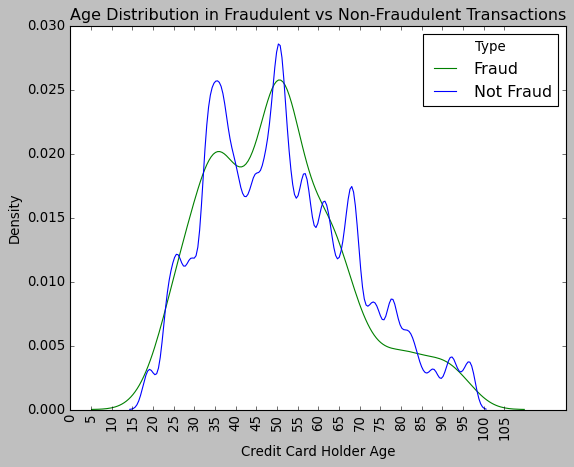

In [45]:
ax=sns.kdeplot(x='age',data=train, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.xticks(rotation=90)
plt.show()

Age vs Fraud

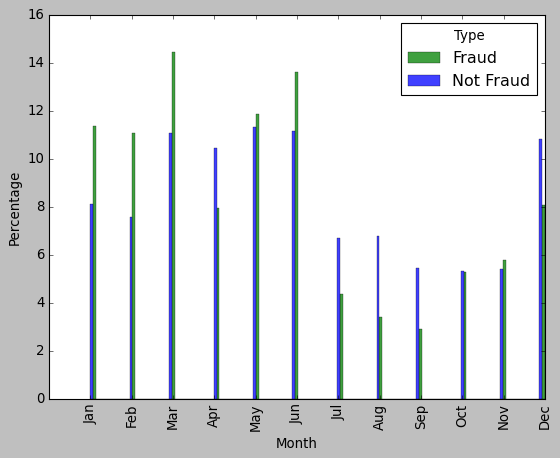

In [46]:
ax=sns.histplot(data=train, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.xticks(rotation=90)
plt.show()

Category vs Fraud

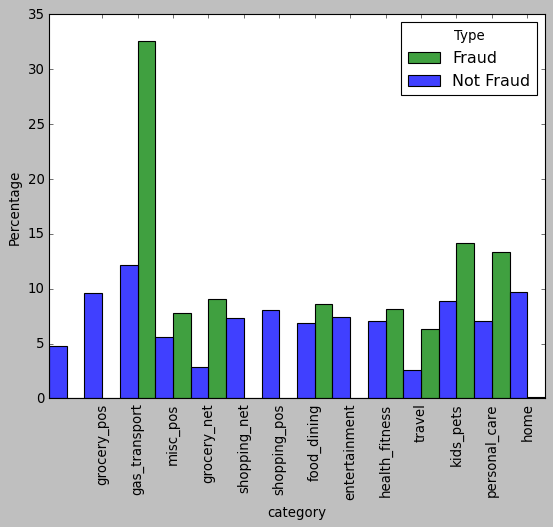

In [49]:
ax=sns.histplot(data=train, x="category", hue="is_fraud", stat='percent', multiple='dodge', common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('category')
plt.xticks(np.arange(1,14,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.xticks(rotation=90)
plt.show()

State vs Fraud

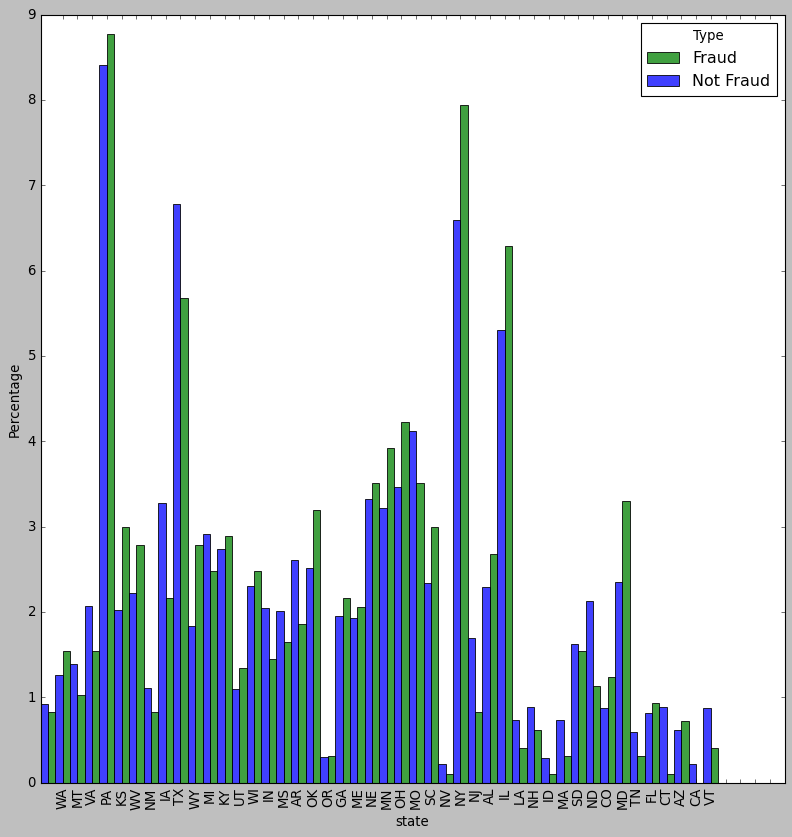

In [50]:
plt.figure(figsize=(12,12))
ax=sns.histplot(data=train, x="state", hue="is_fraud", stat='percent', multiple='dodge', common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('state')
plt.xticks(np.arange(1,51,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.xticks(rotation=90)
plt.show()

# MODEL SELECTION

Get_dummies for gender column

In [51]:
train["gender"]=pd.get_dummies(train["gender"],drop_first=True)

Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le=LabelEncoder()

In [54]:
for i in train.select_dtypes(include='object'):
    train[i]=le.fit_transform(train[i])

In [55]:
train.head()
train.is_fraud.value_counts()

0    670121
1       969
Name: is_fraud, dtype: int64

Normalization of dataset

In [56]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler(random_state=10)

In [57]:
x=train.drop(['is_fraud'],axis=1)
y=train.is_fraud

In [58]:
x,y=rs.fit_resample(x,y)

In [59]:
y.value_counts()

0    670121
1    670121
Name: is_fraud, dtype: int64

In [60]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340242 entries, 0 to 1340241
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1340242 non-null  int32  
 1   amt         1340242 non-null  float64
 2   gender      1340242 non-null  uint8  
 3   state       1340242 non-null  int32  
 4   lat         1340242 non-null  float64
 5   long        1340242 non-null  float64
 6   city_pop    1340242 non-null  int64  
 7   merch_lat   1340242 non-null  float64
 8   merch_long  1340242 non-null  float64
 9   year        1340242 non-null  int64  
 10  month       1340242 non-null  int64  
 11  day         1340242 non-null  int64  
 12  hour        1340242 non-null  int64  
 13  minute      1340242 non-null  int64  
 14  second      1340242 non-null  int64  
 15  age         1340242 non-null  int64  
dtypes: float64(5), int32(2), int64(8), uint8(1)
memory usage: 144.4 MB


Standarization

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [62]:
scaler.fit(x)

StandardScaler()

In [63]:
scaled_features=scaler.transform(x)

In [64]:
df=pd.DataFrame(scaled_features,columns=x.columns)

In [65]:
df

,category,amt,gender,state,lat,long,city_pop,merch_lat,merch_long,year,month,day,hour,minute,second,age
0,0.616525,-0.866845,-0.860784,-0.109791,-0.757048,0.687432,2.281924,-0.764585,0.607752,-0.625542,-1.397370,-1.684078,-1.517739,-1.705804,-0.658751,-0.912315
1,-0.433821,1.697941,-0.860784,1.409457,2.172721,-2.647830,-1.058515,2.214773,-2.642159,-0.625542,-1.397370,-1.684078,-1.517739,-1.705804,0.834490,-0.332051
2,-0.958994,0.137149,1.161731,-0.189751,1.564946,-2.098741,0.728510,1.733300,-2.136266,-0.625542,-1.397370,-1.684078,-1.517739,-1.648425,-0.773616,0.306239
3,0.879112,0.060902,1.161731,1.249536,-0.221391,0.841909,-1.108431,-0.160974,0.914940,-0.625542,-1.397370,-1.684078,-1.517739,-1.533667,-1.347940,-0.796262
4,-0.958994,1.381920,-0.860784,0.769774,0.225610,1.225434,0.947146,0.287339,1.137948,-0.625542,-1.397370,-1.684078,-1.517739,-1.476288,-1.233075,0.654398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340237,-0.958994,-0.531010,-0.860784,1.569378,-0.003895,0.989613,0.714534,-0.182238,0.987074,-0.625542,0.349370,-0.553659,-1.399273,-1.189393,0.604760,0.364266
1340238,0.353939,-0.889669,-0.860784,-0.989355,-0.181364,-0.967563,-0.887799,-0.085017,-0.948727,1.598614,0.058246,0.237635,1.088512,-0.041813,0.202734,0.654398
1340239,-0.958994,-0.700056,-0.860784,-0.669513,-0.223358,1.218536,-0.490460,-0.280529,1.299454,-0.625542,0.058246,-0.666700,-1.162341,-0.099192,-0.256725,-0.738236
1340240,-0.696407,-0.593462,-0.860784,1.089615,-1.722026,-1.254622,-1.184305,-1.681858,-1.166154,1.598614,0.058246,0.576761,-1.517739,-1.418909,-1.520237,0.190187


Model

In [66]:
from  sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=5)
kf
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [67]:
knn

KNeighborsClassifier(n_neighbors=3)

# KFold technique

1.Logistic Regression

In [56]:
lr=cross_val_score(LogisticRegression(), df,y)

In [57]:
print(np.mean(lr))

0.5986038948795993


2.Support vector machine

In [ ]:
svm=cross_val_score(SVC(), x,y)  

3.Random Forest

In [59]:
rf=cross_val_score(RandomForestClassifier(), df,y) 

In [60]:
rf

array([0.97212077, 0.99952621, 0.99966424, 0.94571122, 0.99605295])

In [61]:
print(np.mean(rf))

0.9826150751753604


4.Knn

In [ ]:
kn=cross_val_score(KNeighborsClassifier(), df,y) 

In [56]:
kn

array([0.9985637 , 0.99857116, 0.99851519, 0.9986383 , 0.99844431])

In [57]:
print(np.mean(kn))

0.9985465311176712


Train test Split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.30)

In [70]:
Rf=RandomForestClassifier()

In [71]:
Rf.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
pred=Rf.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [74]:
print(accuracy_score(pred,y_test))

0.9999552320101076


In [76]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    200899
           1       1.00      1.00      1.00    201174

    accuracy                           1.00    402073
   macro avg       1.00      1.00      1.00    402073
weighted avg       1.00      1.00      1.00    402073



In [79]:
print(confusion_matrix(pred,y_test))

[[200899      0]
 [    18 201156]]


<AxesSubplot:>

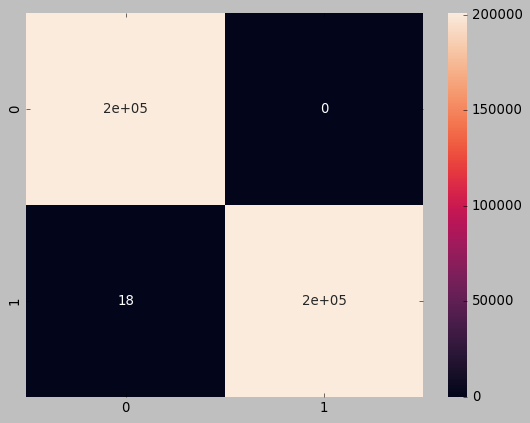

In [81]:
sns.heatmap(confusion_matrix(pred,y_test),annot=True)